# kmodes

Use the "Run" button to execute the code.

In [24]:
!pip install jovian --upgrade --quiet

In [25]:
import jovian

In [52]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Create toy dataset
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person')
data

,hair_color,eye_color,skin_color
person,,,
P1,blonde,amber,fair
P2,brunette,gray,brown
P3,red,green,brown
P4,black,hazel,brown
P5,brunette,amber,fair
P6,black,gray,brown
P7,red,green,fair
P8,black,hazel,fair


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 15.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 11.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration:

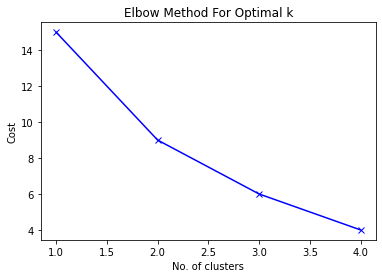

In [54]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 6.0
Run 1, iteration: 2/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 6.0
Run 2, iteration: 2/100, moves: 1, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 8.0
Run 5, iteration: 2/100, moves: 0, cost: 8.0
Best run was number 1


array([0, 0, 2, 1, 0, 1, 2, 1], dtype=uint16)

In [56]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,hair_color,eye_color,skin_color
person,,,,
P1,0,blonde,amber,fair
P2,0,brunette,gray,brown
P3,2,red,green,brown
P4,1,black,hazel,brown
P5,0,brunette,amber,fair
P6,1,black,gray,brown
P7,2,red,green,fair
P8,1,black,hazel,fair


In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="kmodes")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
